In [126]:
import pandas as pd
from math import sqrt

In [127]:
qw = pd.read_csv("aggregated_quality_workers.csv").sort_values(by='ResumeID')

In [129]:
rw = pd.read_csv("aggregated_random_workers.csv").sort_values(by='ResumeID')

In [169]:
diff = {}
cosine_similarities = {}
for i, resume in qw.iterrows():
    dot = 0.0
    a_vals = []
    b_vals = [] 
    for col in qw.columns:
        if not type(qw.iloc[i][col]) == str:
            dot += qw.iloc[i][col]*rw.iloc[i][col]
            a_vals.append(int(qw.iloc[i][col]))
            b_vals.append(int(rw.iloc[i][col]))
        if not qw.iloc[i][col] == rw.iloc[i][col]:
            curr = diff.get(col, 0)
            diff[col] = curr + 1
    cosine_similarities[i] = dot/(sqrt(sum([a*a for a in a_vals]))*sqrt(sum([b*b for b in b_vals])))
        

In [143]:
import matplotlib.pyplot as plt

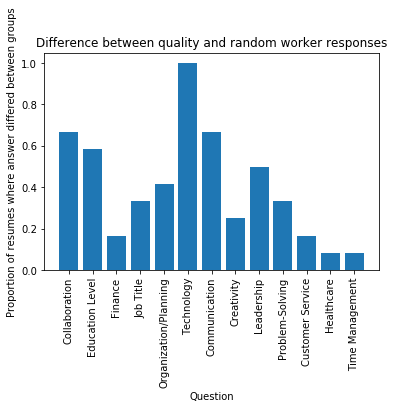

In [167]:
x = list(diff.keys())
y = list(diff.values())
plt.bar(x, [v/12 for v in y])
plt.xticks(rotation=90)
plt.xlabel("Question")
plt.ylabel("Proportion of resumes where answer differed between groups")
plt.title("Difference between quality and random worker responses")
plt.show()

In [170]:
sum(cosine_similarities.values())/len(cosine_similarities.values())

0.8938634833032982

In [176]:
random_batch = pd.read_csv("random_workers_batch_results.csv")
quality_batch = pd.read_csv("quality_workers_batch_results.csv")

random_aggregated_match = {}
for i, row in random_batch.iterrows():
    aggregated = rw.loc[rw['ResumeID'] == row['Input.document_url']]
    for col in random_batch.columns:
        if aggregated[col] == row[col]:
            curr = random_aggregated_match.get(col, 0)
            random_aggregated_match[col] = curr + 1

In [186]:
for i, r in random_batch.iterrows():
    print(r['Input.document_url'].split("/")[-1].split)


resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume1.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume2.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume3.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume4.pdf
resume5.pdf
resume5.pdf
resume5.pdf
resu

In [171]:
qw.columns

Index(['ResumeID', 'Collaboration', 'Communication', 'Creativity',
       'Customer Service', 'Education Level', 'Entertainment', 'Finance',
       'Government', 'Healthcare', 'Job Title', 'Law', 'Leadership',
       'Manufacturing', 'Organization/Planning', 'Other', 'Problem-Solving',
       'Service Industry', 'Sports', 'Technology', 'Time Management'],
      dtype='object')

In [181]:
rw

,ResumeID,Collaboration,Communication,Creativity,Customer Service,Education Level,Entertainment,Finance,Government,Healthcare,...,Law,Leadership,Manufacturing,Organization/Planning,Other,Problem-Solving,Service Industry,Sports,Technology,Time Management
0,1,False,True,False,False,bachelors,0,0,0,0,...,0,True,0,True,0,False,0,0,0,False
4,2,False,True,False,False,bachelors,0,0,0,0,...,0,True,0,False,0,False,0,0,0,False
5,3,False,True,False,False,bachelors,0,0,0,0,...,0,True,0,True,0,True,0,0,0,False
6,4,True,True,False,False,bachelors,0,0,0,0,...,0,True,0,True,0,True,0,0,0,False
7,5,False,True,False,False,bachelors,0,1,0,0,...,0,True,0,True,0,False,0,0,0,False
8,6,False,True,False,False,bachelors,0,0,0,0,...,0,True,0,True,0,False,0,0,0,False
9,7,False,False,False,False,bachelors,0,1,0,0,...,0,True,0,False,0,False,0,0,1,False
10,8,False,True,False,True,bachelors,0,1,0,0,...,0,True,0,True,0,False,0,1,0,False
11,9,False,True,False,False,bachelors,0,0,0,0,...,0,True,0,False,0,False,0,0,0,False
1,10,True,True,True,True,bachelors,0,0,0,0,...,0,True,0,True,0,True,0,0,0,False


In [ ]:
o